In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import pandas as pd

import seaborn as sns; sns.set(style="ticks", color_codes=True)

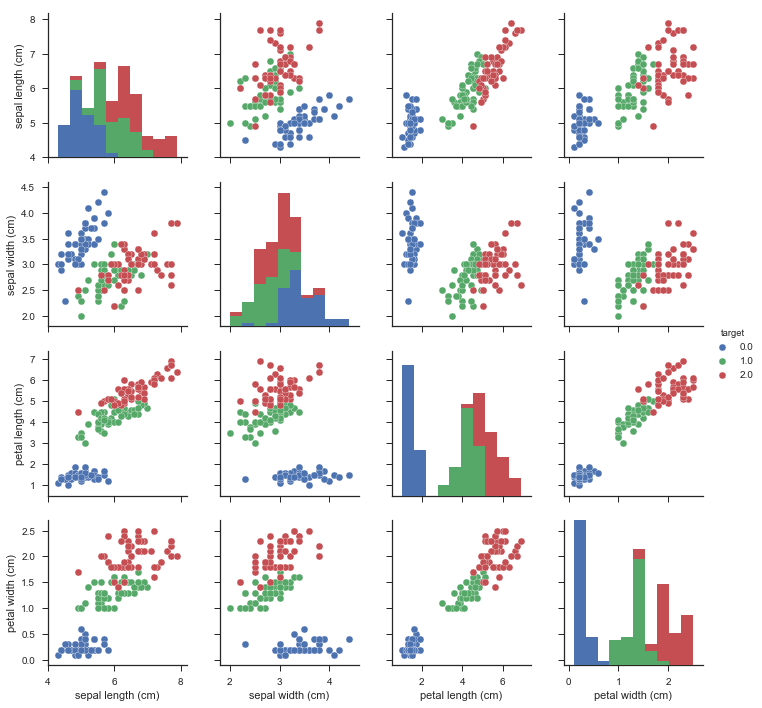

In [35]:
iris_data = datasets.load_iris()

iris_df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                       columns= iris_data['feature_names'] + ['target'])

sns.pairplot(iris_df, vars=iris_data['feature_names'], hue="target")
plt.show()

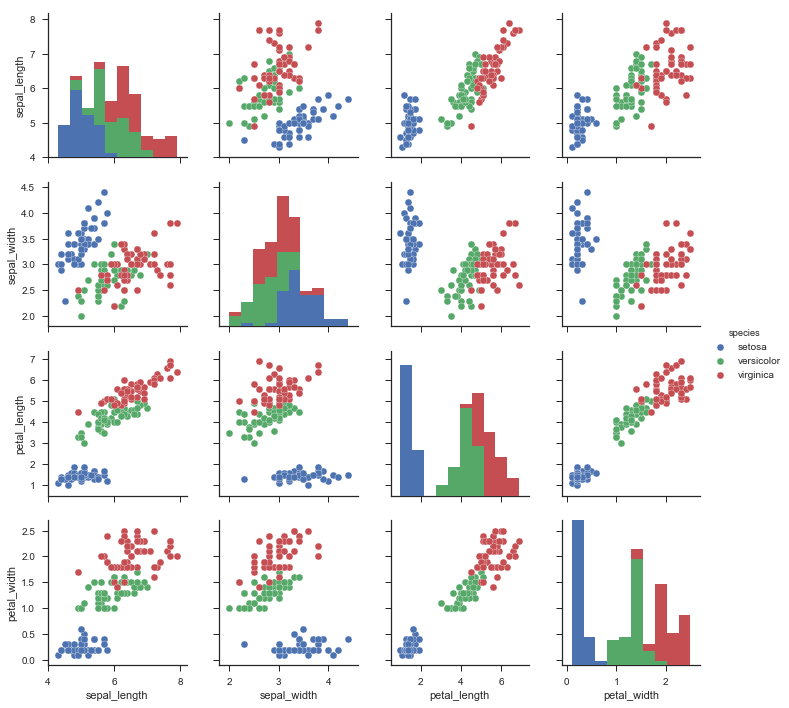

In [42]:
iris_sns = sns.load_dataset("iris")
sns.pairplot(iris_sns, hue='species')
plt.show()

In [8]:
X0 = iris_data['data'][:,0] #sepal length in cm
X1 = iris_data['data'][:,1] #sepal width in cm
X2 = iris_data['data'][:,2] #petal length in cm
X3 = iris_data['data'][:,3] #petal width in cm

# KMEANS

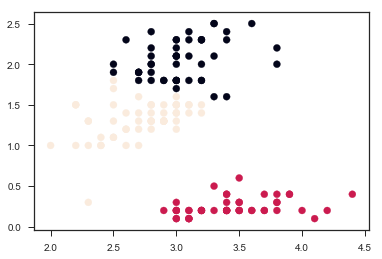

In [43]:
from sklearn.cluster import KMeans

X = iris_data['data'][:,(1,3)]  #length, width
Y = (iris_data['target'] == 2).astype(np.float64)

model = KMeans(n_clusters=3)
y_pred = model.fit_predict(X)

fig = plt.figure()
plt.subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

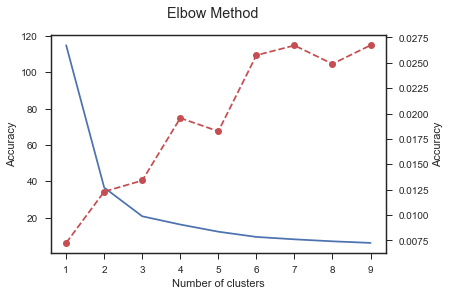

In [34]:
import time
clusters = range(1,10)
accuracy = []
time_list = []
for i in clusters:
    t0 = time.time()
    model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    t1 = time.time()
    accuracy.append(model.inertia_)
    time_list.append(t1-t0)
    
fig = plt.figure()

ax = fig.add_subplot(111) 
ax.plot(clusters, accuracy)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of clusters')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Accuracy')
ax2.plot(clusters, time_list, 'ro--')

fig.suptitle('Elbow Method')
plt.show()

# SVM

In [10]:
from sklearn.model_selection import train_test_split

#X=iris_df[iris_data['feature_names']]
#Y=iris_df['target']
X = iris_data['data']
Y = (iris_data['target']).astype(np.float64)
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)
y_svm=model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_svm))
print(classification_report(y_test, y_svm))

[[14  0  0]
 [ 0 17  0]
 [ 0  0 14]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        14
        1.0       1.00      1.00      1.00        17
        2.0       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        45



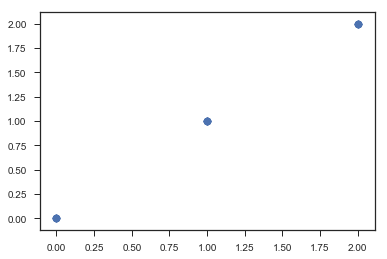

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(y_test), list(y_svm))
plt.show()

In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

[3.3  3.32 3.34 ... 8.84 8.86 8.88]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

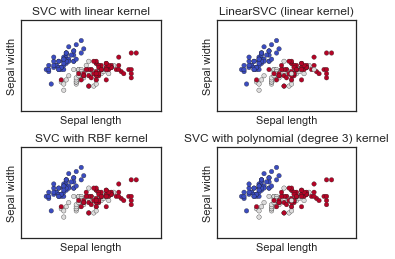

In [26]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

xx, yy = make_meshgrid(X0, X1)
print(xx.ravel())
for clf, title, ax in zip(models, titles, sub.flatten()):

    Z = clf.predict(X)
    print(Z)
    #Z = clf.predict(np.c_[X0.ravel(), X1.ravel()])
    #Z = Z.reshape(xx.shape)
    #out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Z, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()